In [31]:
%matplotlib inline

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Params

In [33]:
def visualise(vars, labels=None):
    height, width = vars[0].shape[1:]
    fig, axes = plt.subplots(height, width, sharex=True, sharey=True, figsize=(15,10))
    for i in range(height):
        for j in range(width):
            actors = [axes[i,j].plot(v[:,i,j])[0] for v in vars]
            
            axes[i,j].get_xaxis().set_visible(False)
            axes[i,j].get_yaxis().set_visible(False)
    
    if labels is not None:
        fig.legend(actors, labels, loc="lower center", ncol=len(labels))

def hide_axes(axis):
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)

In [34]:
WIDTH = 16
HEIGHT = 16
TIMESTEPS = 16

# Stimuli generation

In [35]:
PROB = 0.1

# Generate 6 octaves of perlin noise **NOTE** this is random copy-paste
x = (np.random.rand(HEIGHT, WIDTH) > PROB).astype(np.float64)

images = np.empty((TIMESTEPS, HEIGHT, WIDTH))
for i in range(TIMESTEPS):
    images[i] = np.roll(x, -i, axis=1)

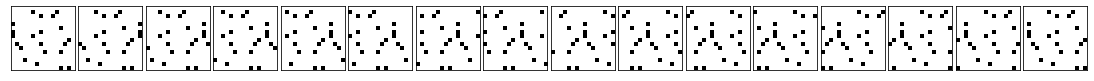

In [36]:
fig, axes = plt.subplots(1,TIMESTEPS, sharey=True, figsize=(15,5))
for t, a in enumerate(axes):
    a.imshow(images[t,:,:], cmap="gray")
    a.get_xaxis().set_visible(False)
    a.get_yaxis().set_visible(False)
fig.tight_layout(pad=0)


# High-pass filters

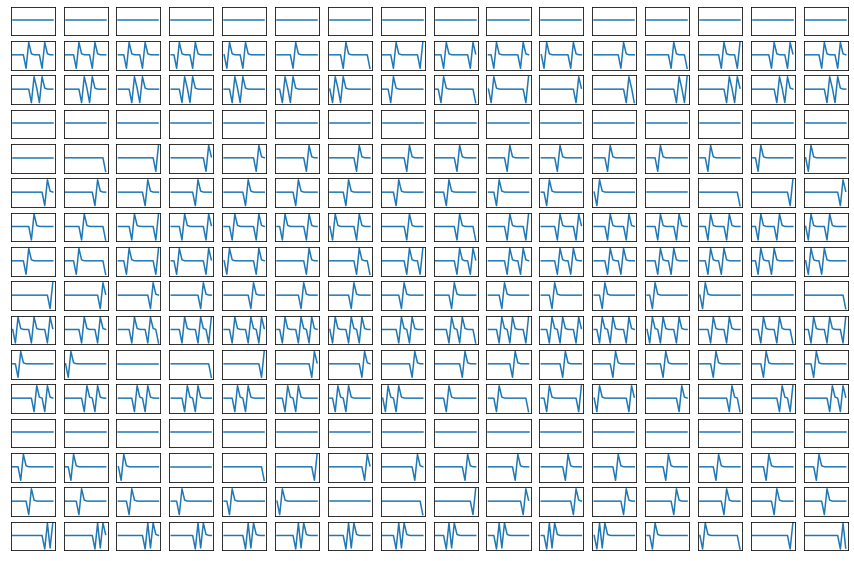

In [37]:
LPF_TAU = 0.4

# EMA time constant
LPF_K = np.exp(-1 / LPF_TAU)

lpf = np.ones((TIMESTEPS, HEIGHT, WIDTH))
f = np.zeros((TIMESTEPS, HEIGHT, WIDTH))
for t in range(1, TIMESTEPS):
    lpf[t] = (LPF_K * lpf[t - 1]) + ((1.0 - LPF_K) * images[t])
    f[t] = (images[t] - lpf[t])

visualise([f])

# Half-wave rectification

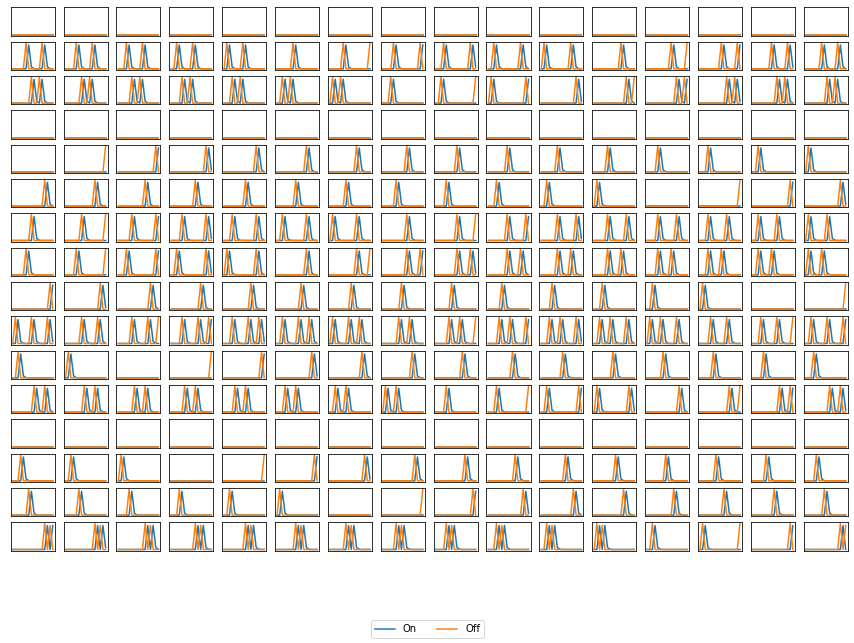

In [38]:
on = np.maximum(f, 0.0)
off = -np.minimum(f, 0.0)

visualise([on, off], ["On", "Off"])

# Delay

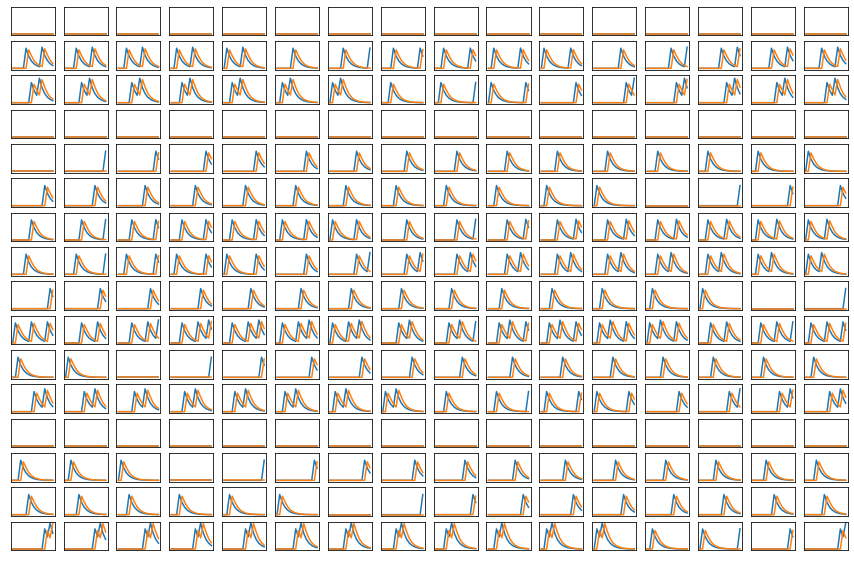

In [39]:
DELAY_TAU = 2
DELAY_K = np.exp(-1 / DELAY_TAU)

delay_off = np.zeros((TIMESTEPS, HEIGHT, WIDTH))
delay_on = np.zeros((TIMESTEPS, HEIGHT, WIDTH))

for t in range(1, TIMESTEPS):
    delay_off[t] = ((1.0 - DELAY_K) * off[t]) + (DELAY_K * delay_off[t - 1])
    delay_on[t] = ((1.0 - DELAY_K) * on[t]) + (DELAY_K * delay_on[t - 1])
    

visualise([delay_off, delay_on])

0.0983335813841143 0.28165033705605336


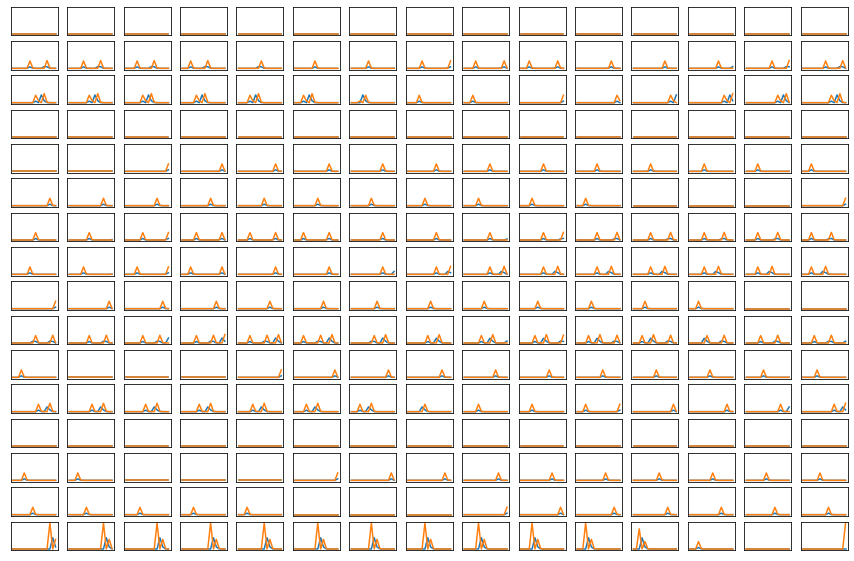

In [40]:

on_left = delay_on[:,:,:-1] * on[:,:,1:]
on_right = delay_off[:,:,1:] * on[:,:,:-1]

visualise([on_left, on_right], ["Left", "Right"])

print(np.sum(on_left), np.sum(on_right))